In [1]:
from __future__ import print_function
import pickle 
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable  

In [2]:
from sub import subMNIST

Files already downloaded
3000
750


In [3]:
from skimage.transform import rotate

In [4]:
trainset_imoprt = pickle.load(open("train_labeled.p", "rb"))
validset_import = pickle.load(open("validation.p", "rb"))
train_loader = torch.utils.data.DataLoader(trainset_imoprt, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validset_import, batch_size=64, shuffle=True)
images,labels = iter(train_loader).next()
import matplotlib.pyplot as plt
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

In [5]:
images_numpy=images.numpy()

# Translation

In [6]:
images_translated_np = np.zeros((64,1,28,28))

In [7]:
#Translation
def horizontal_translation(nparray_2d,pixels):
    m,n = nparray_2d.shape
    #Collect the white sample data from the frame
    white_sample = np.mean(nparray_2d[:,0])
    if pixels>0:
        big_array= np.ones((m,n+pixels))*white_sample
        big_array[:,pixels:] = nparray_2d
        return big_array[:,:n]
    else:
        big_array = np.ones((m,n-pixels))*white_sample
        big_array[:,:pixels] = nparray_2d
        return big_array[:,-pixels:]
    
def vertical_translation(nparray_2d,pixels):
    m,n = nparray_2d.shape
    white_sample = np.mean(nparray_2d[:,0])
    if pixels>0:
        big_array= np.ones((m+pixels,n))*white_sample
        big_array[pixels:,:] = nparray_2d
        return big_array[:m,:]
    else:
        big_array = np.ones((m-pixels,n))*white_sample
        big_array[:pixels,:] = nparray_2d
        return big_array[-pixels:,:]

In [8]:
for i,image in enumerate(images_numpy):
    image_toTranslate = image[0]
    image_translated = horizontal_translation(image_toTranslate,4)
    images_translated_np[i][0] = image_translated

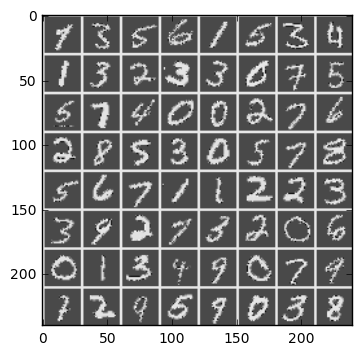

In [9]:
import torchvision
imshow(torchvision.utils.make_grid(images))

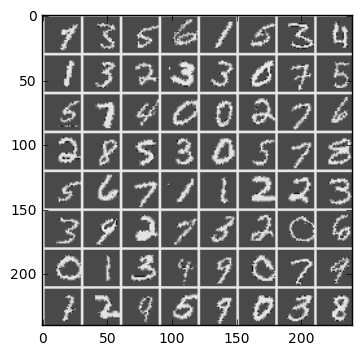

In [10]:
images_translated = torch.from_numpy(images_translated_np)
imshow(torchvision.utils.make_grid(images_translated))

# Rotation

In [11]:
from skimage.transform import rotate

In [12]:
test_image = images_numpy[0][0]
l1_norm = np.linalg.norm(test_image,ord=1)

In [18]:
def rotate_bydegree(array_2d,degree):
    maximun = np.max(array_2d)
    minimun = np.min(array_2d)
    normalized_image = 2*((array_2d-minimun)/(maximun-minimun))-1
    normalized_rotated_image = rotate(normalized_image,degree,mode='wrap')
    unormalized_rotated_image = ((normalized_rotated_image+1)/2)*(maximun-minimun)+minimun
    return unormalized_rotated_image

In [19]:
images_rotated_np =np.zeros((64,1,28,28))
for i,image in enumerate(images_numpy):
    image_toRotate = image[0]
    image_rotated = rotate_bydegree(image_toRotate,30)
    images_rotated_np[i][0] = image_rotated

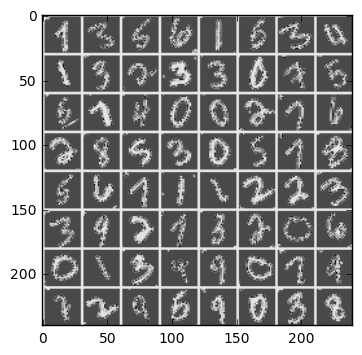

In [20]:
images_rotated = torch.from_numpy(images_rotated_np)
imshow(torchvision.utils.make_grid(images_rotated))